In [1]:
import pm4py 
import pandas

#choose data sets
csv_path = 'BPI_Challenge_2012.csv'
xes_path = 'BPI_Challenge_2012.xes'

#import xes file
log = pm4py.read_xes(xes_path)

#convert event log to dataframe
df_csv = pm4py.convert_to_dataframe(log)
#generate csv from dataframe
df_csv.to_csv(csv_path)

#filter data and remove null values
df = pm4py.format_dataframe(pandas.read_csv(csv_path, sep = ","), case_id = 'case:concept:name', activity_key = 'concept:name', timestamp_key = 'time:timestamp').dropna()


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

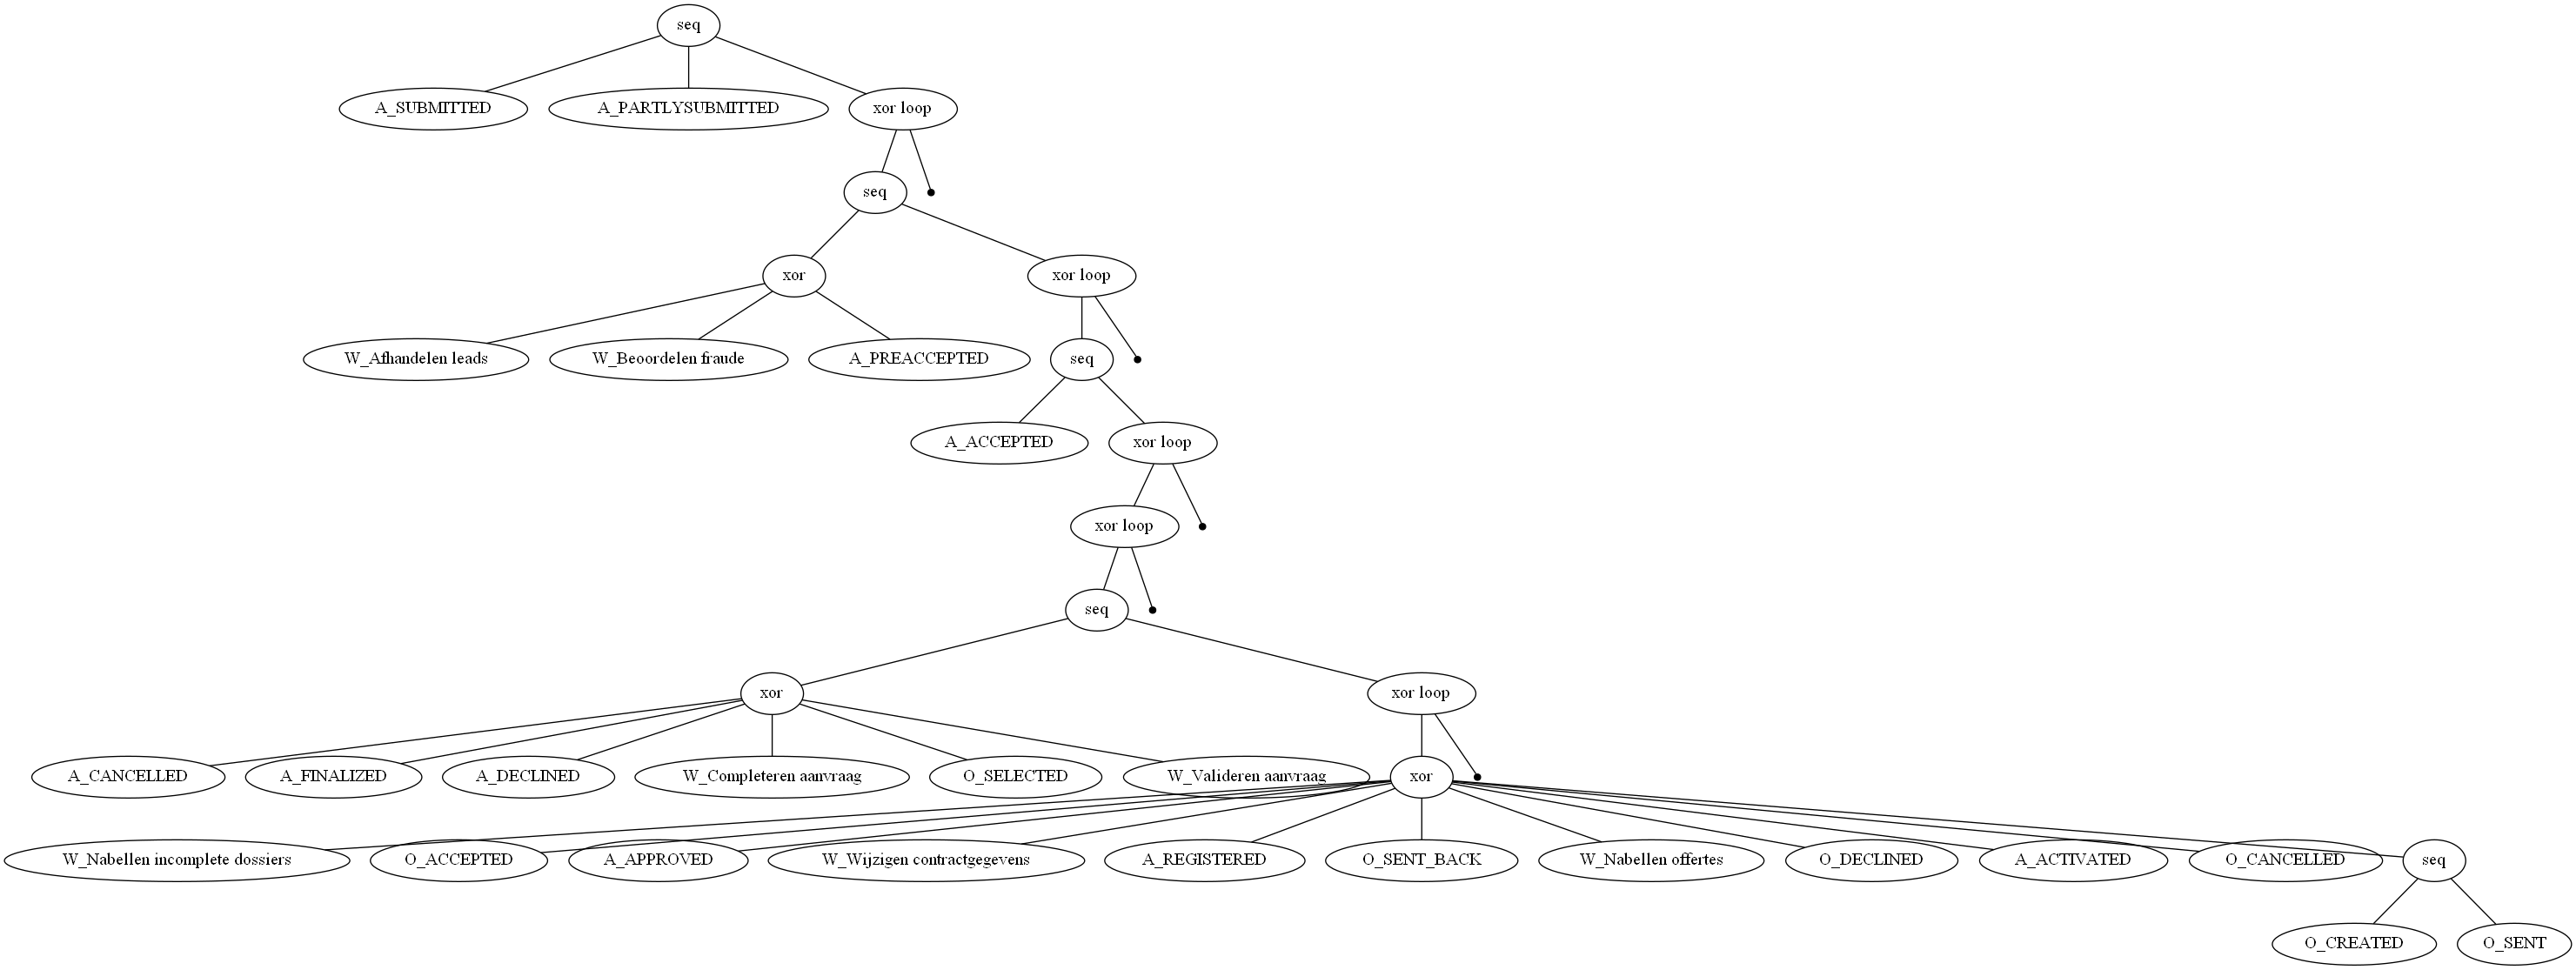

In [2]:
#Process Tree
process_tree = pm4py.discover_process_tree_inductive(df, 1)
pm4py.view_process_tree(process_tree)

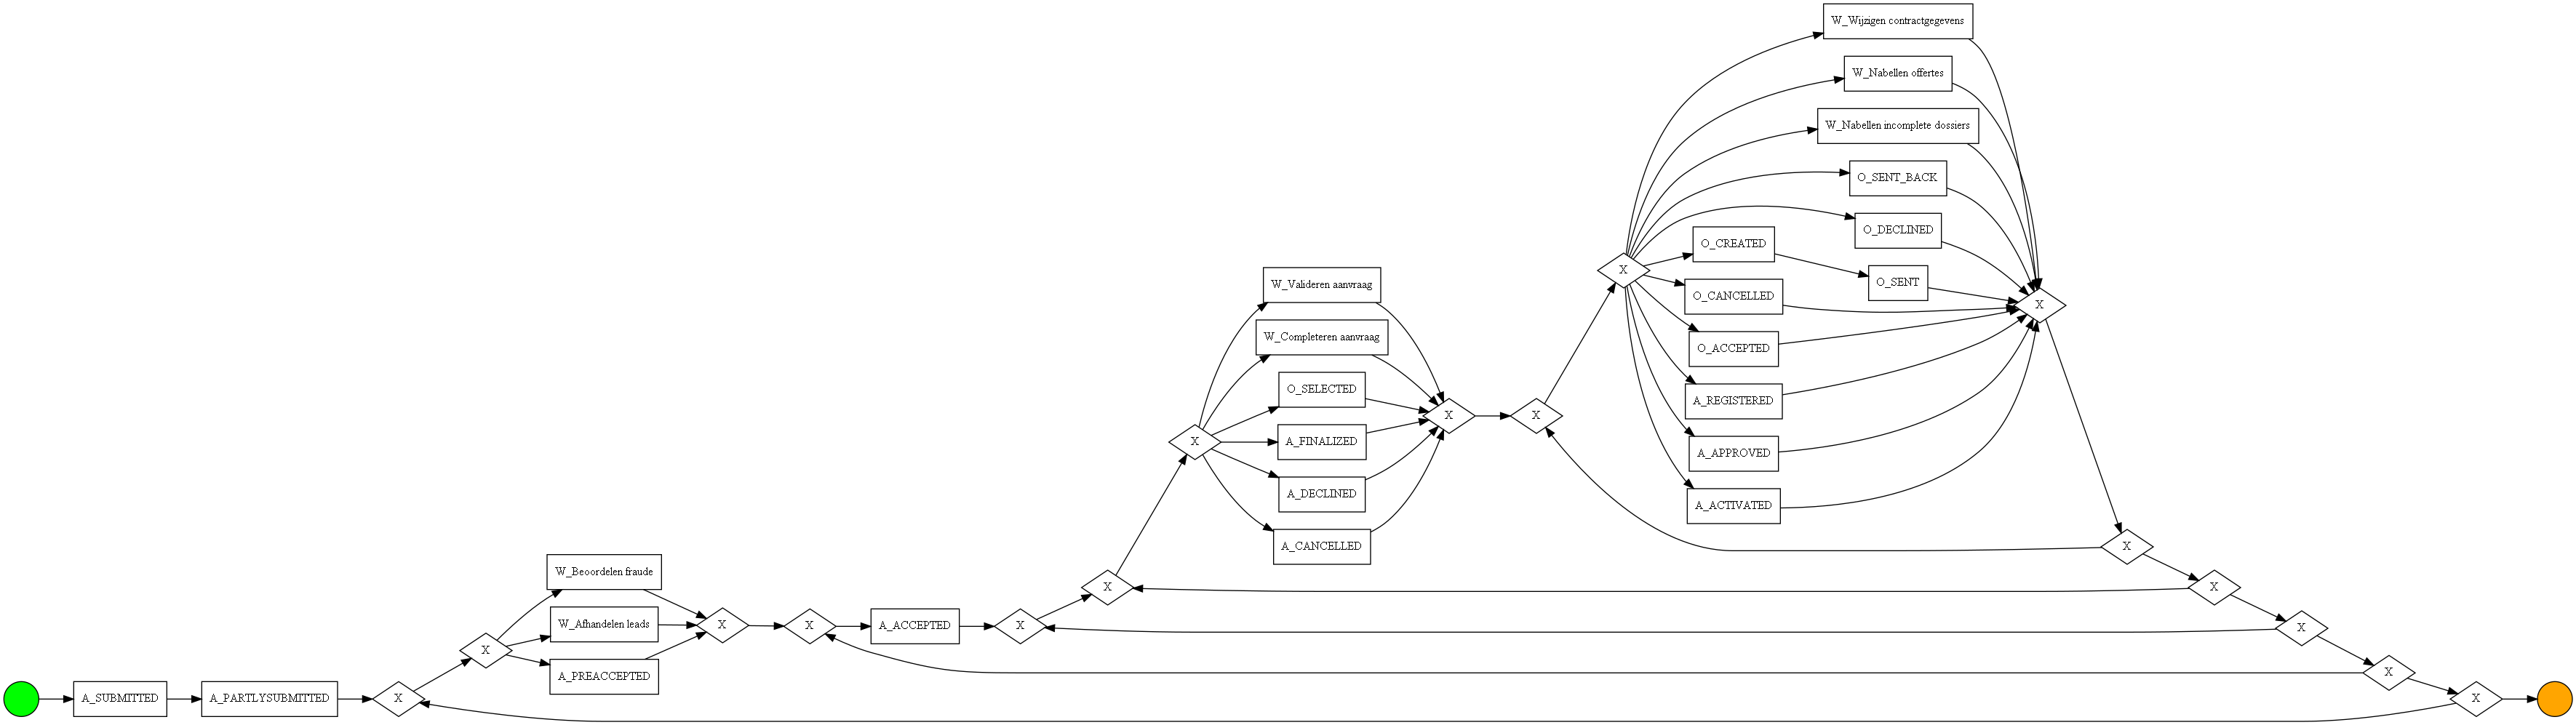

In [3]:
#BPMN
bpmn_model = pm4py.convert_to_bpmn(process_tree, 1)
pm4py.view_bpmn(bpmn_model)

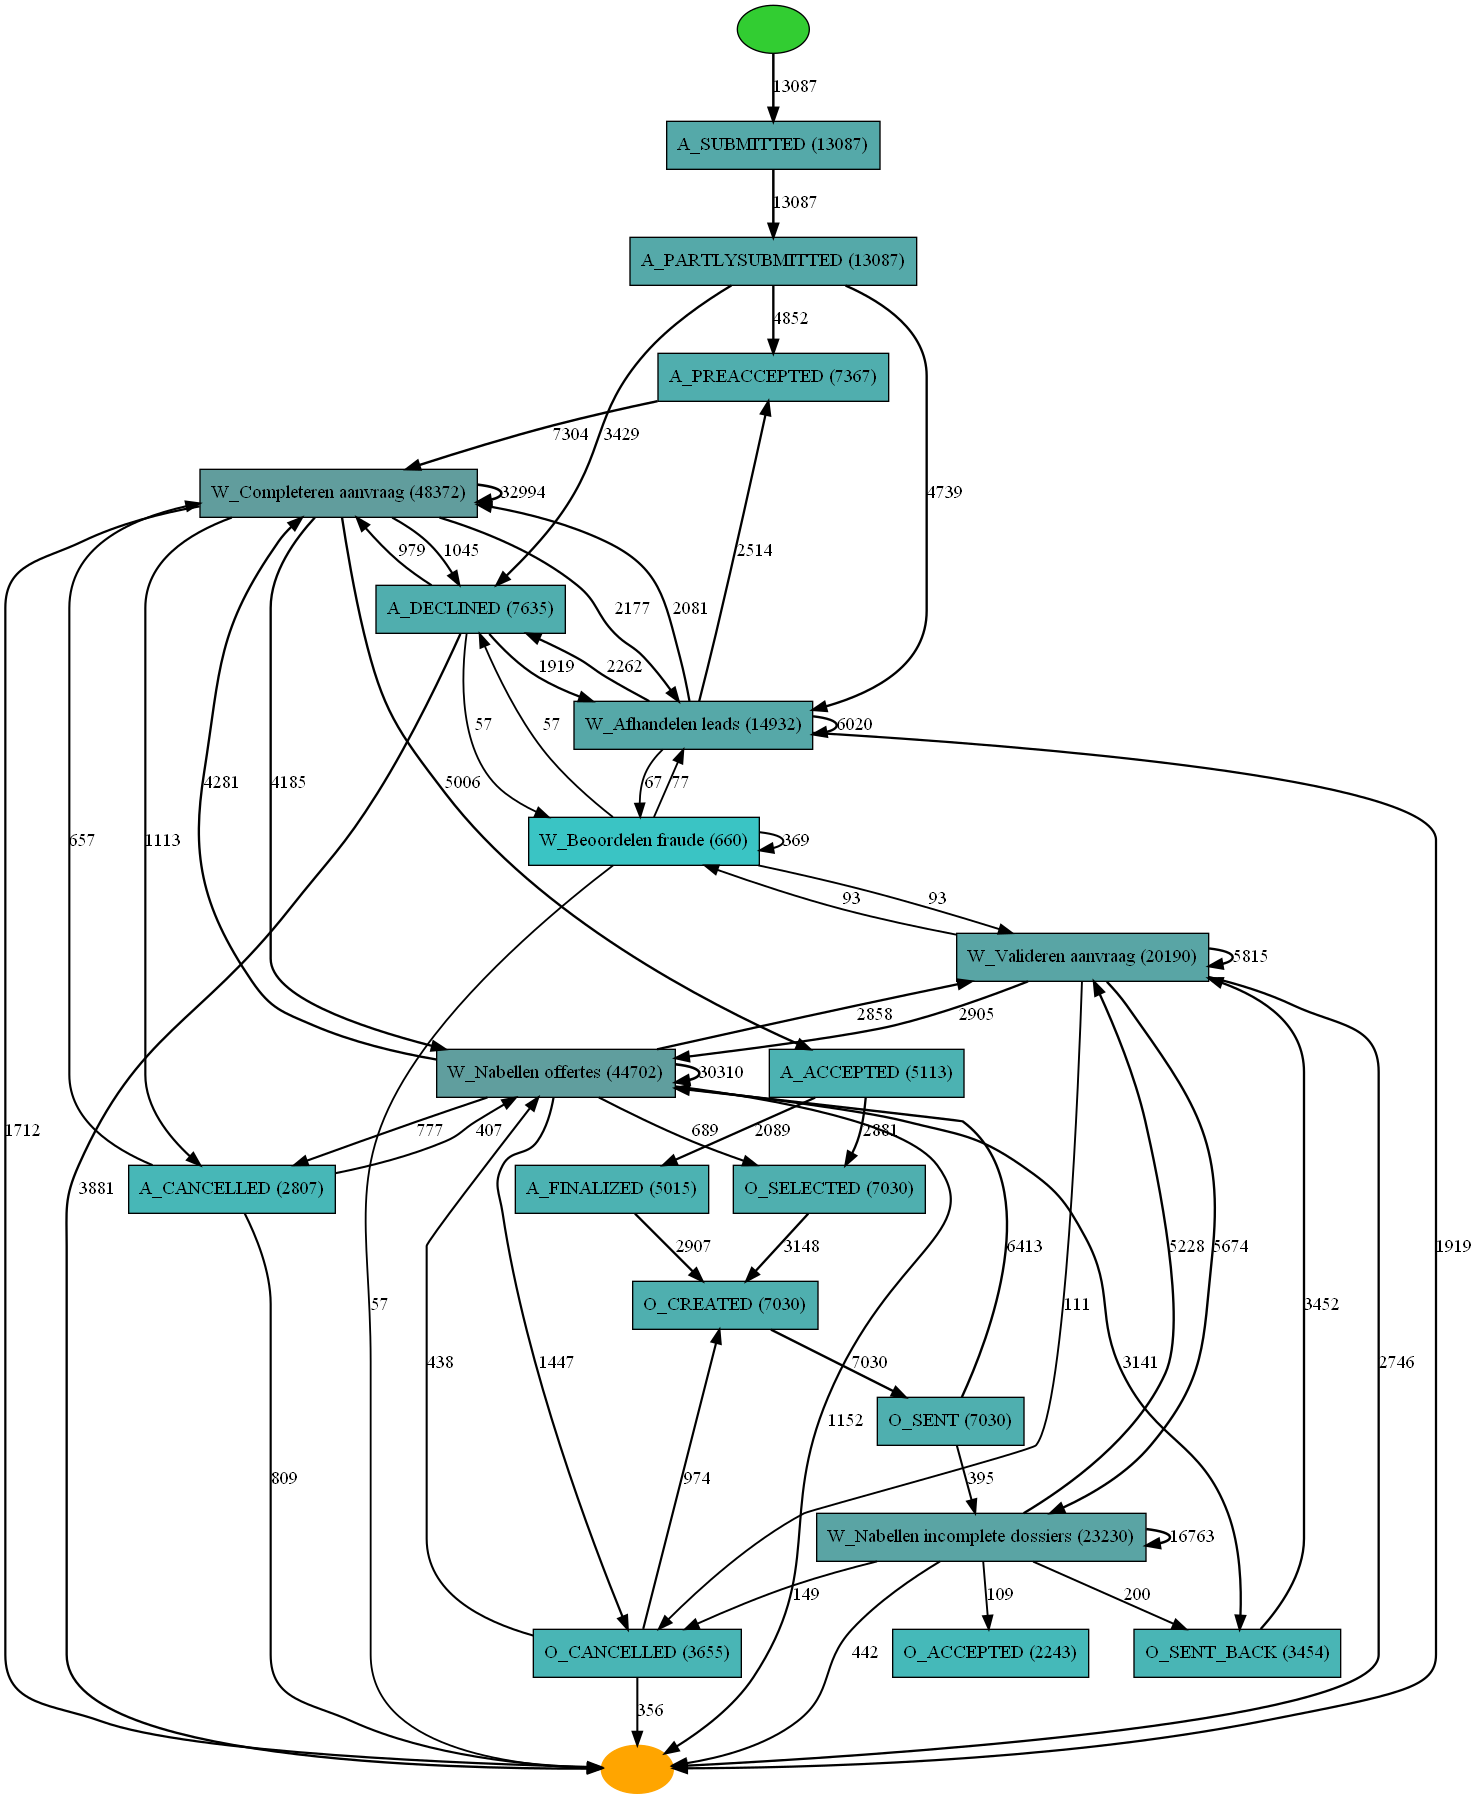

In [4]:
#Heuristic Miner

from pm4py.objects.log.importer.xes import importer as xes_importer
import os

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(df, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


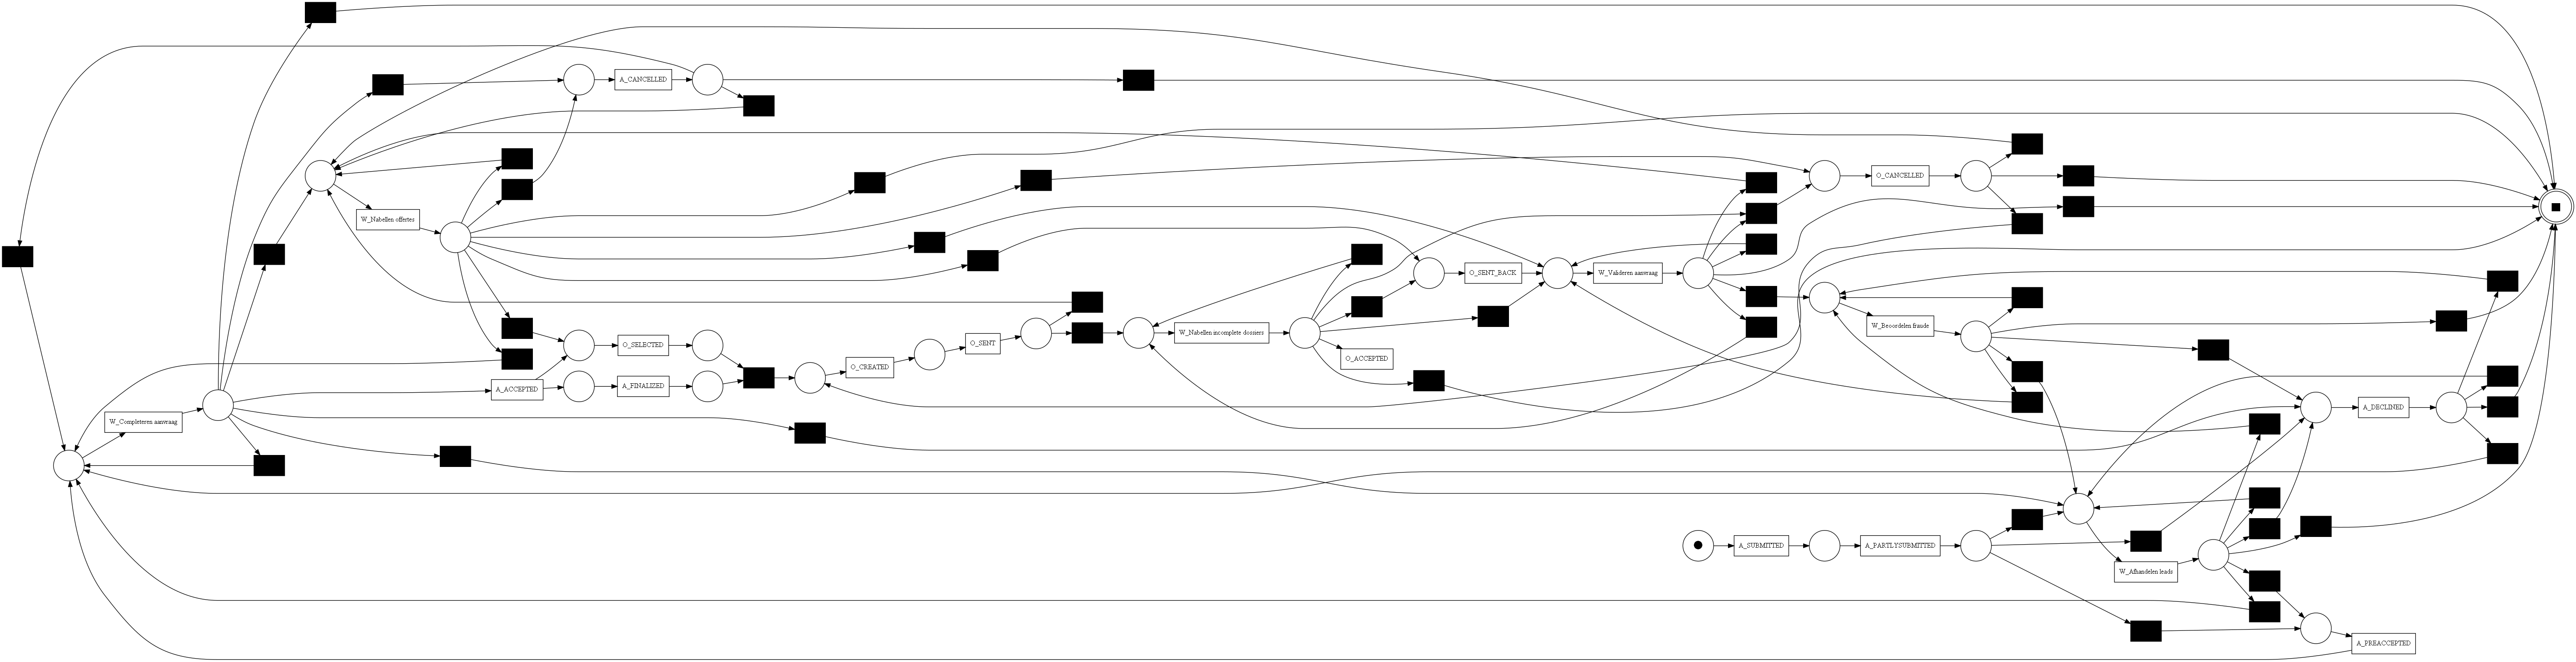

In [5]:
#Petri Net Mined From Heuristic Miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(df, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)


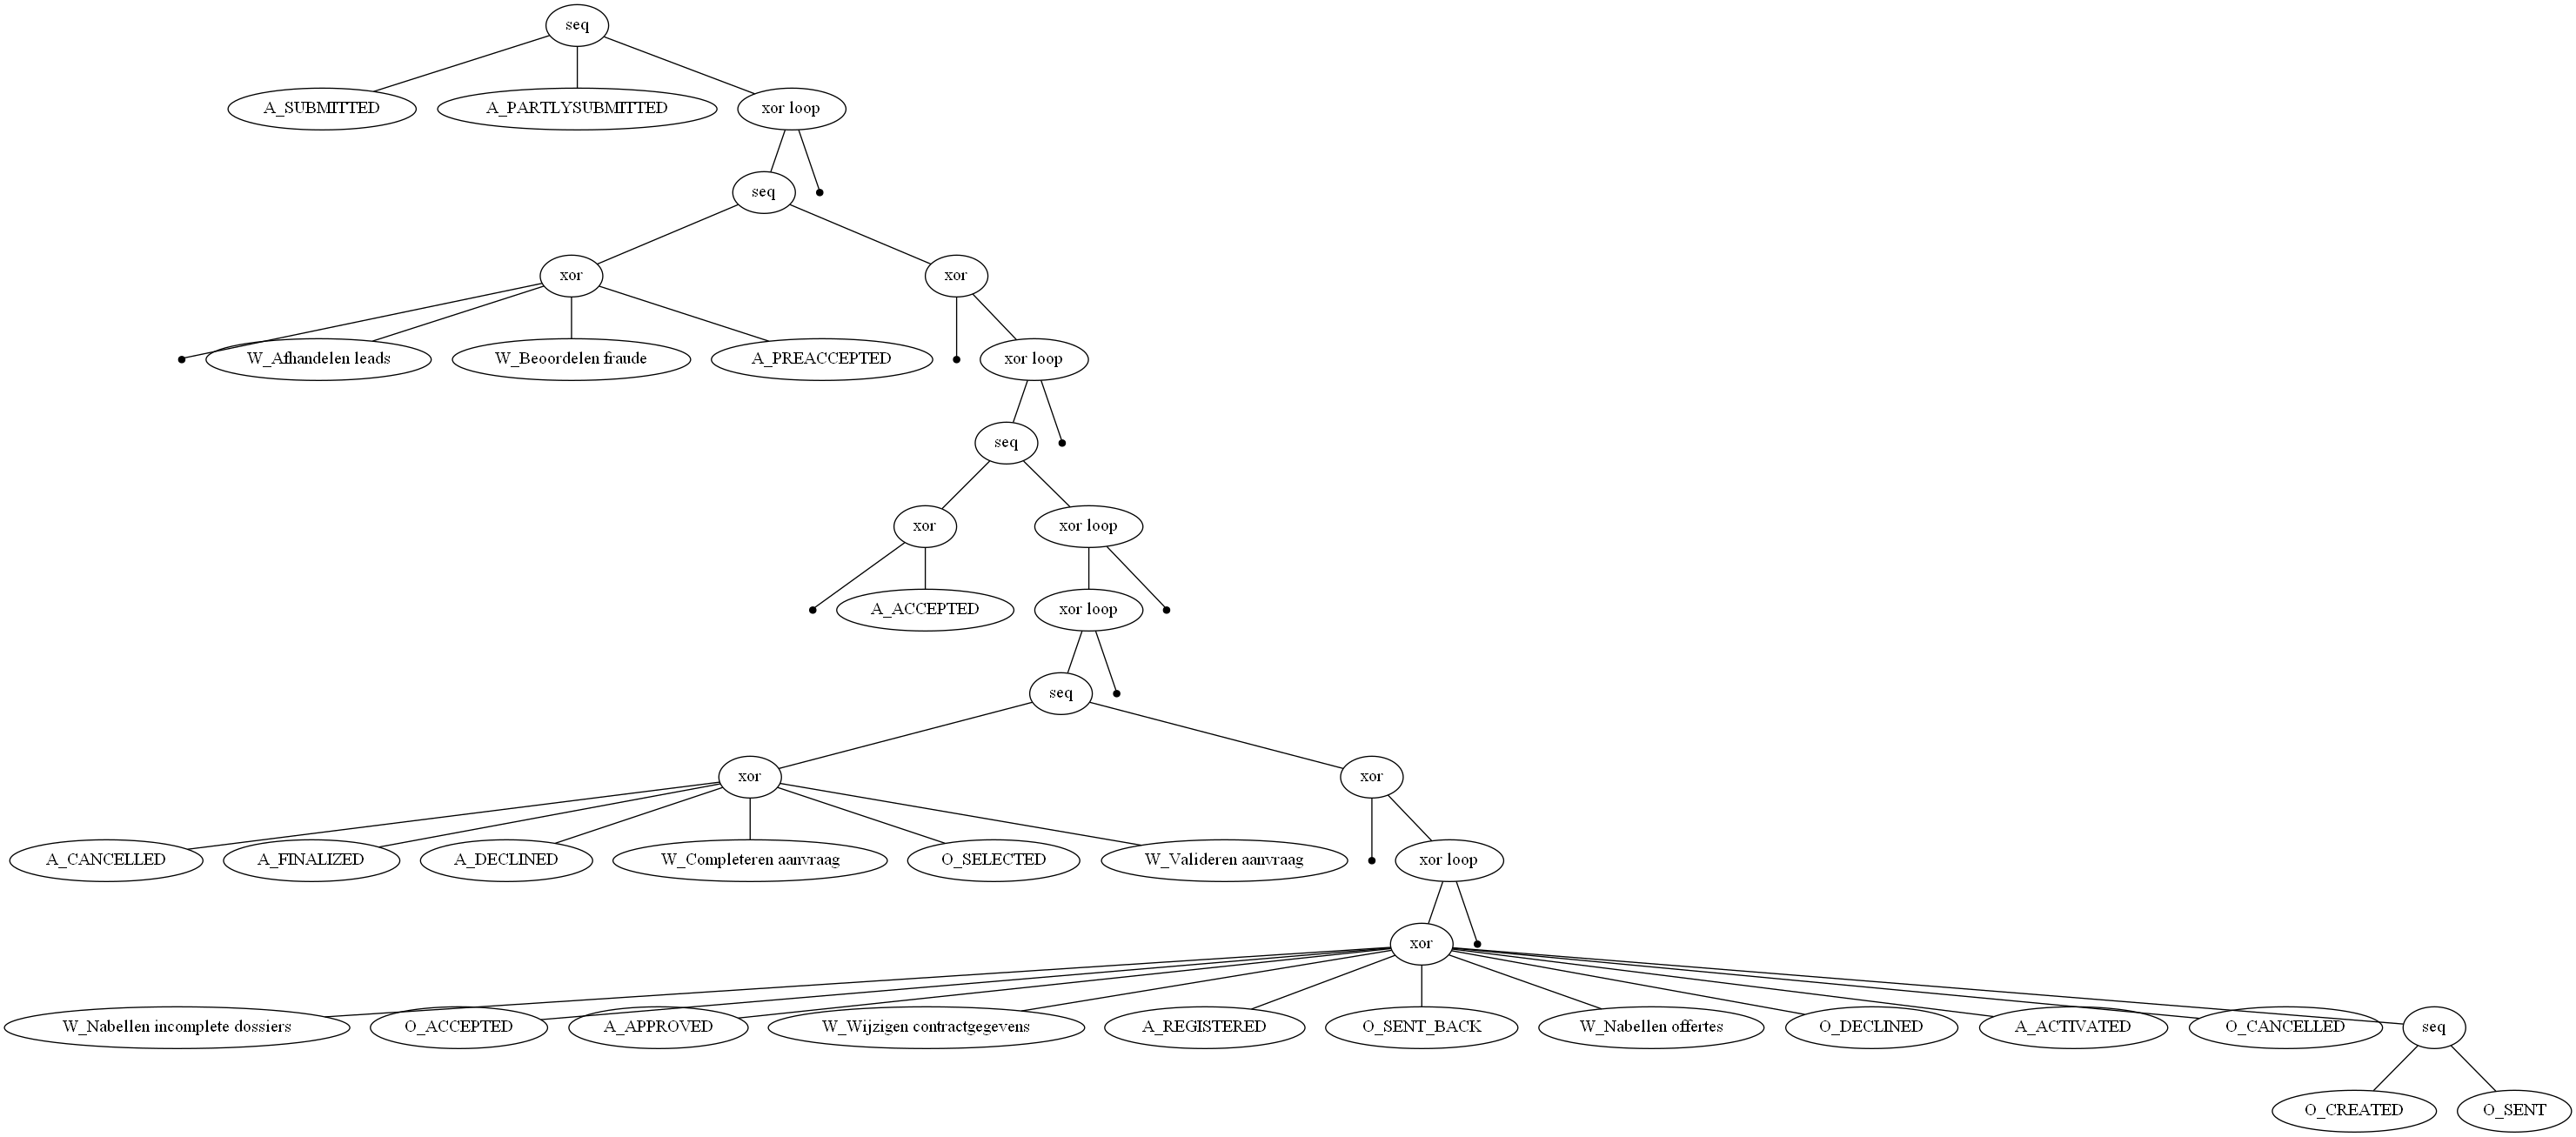

In [6]:
#Inductive Miner

import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net, initial_marking, final_marking = inductive_miner.apply(df)

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(df)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(tree, variant=pt_converter.Variants.TO_PETRI_NET)


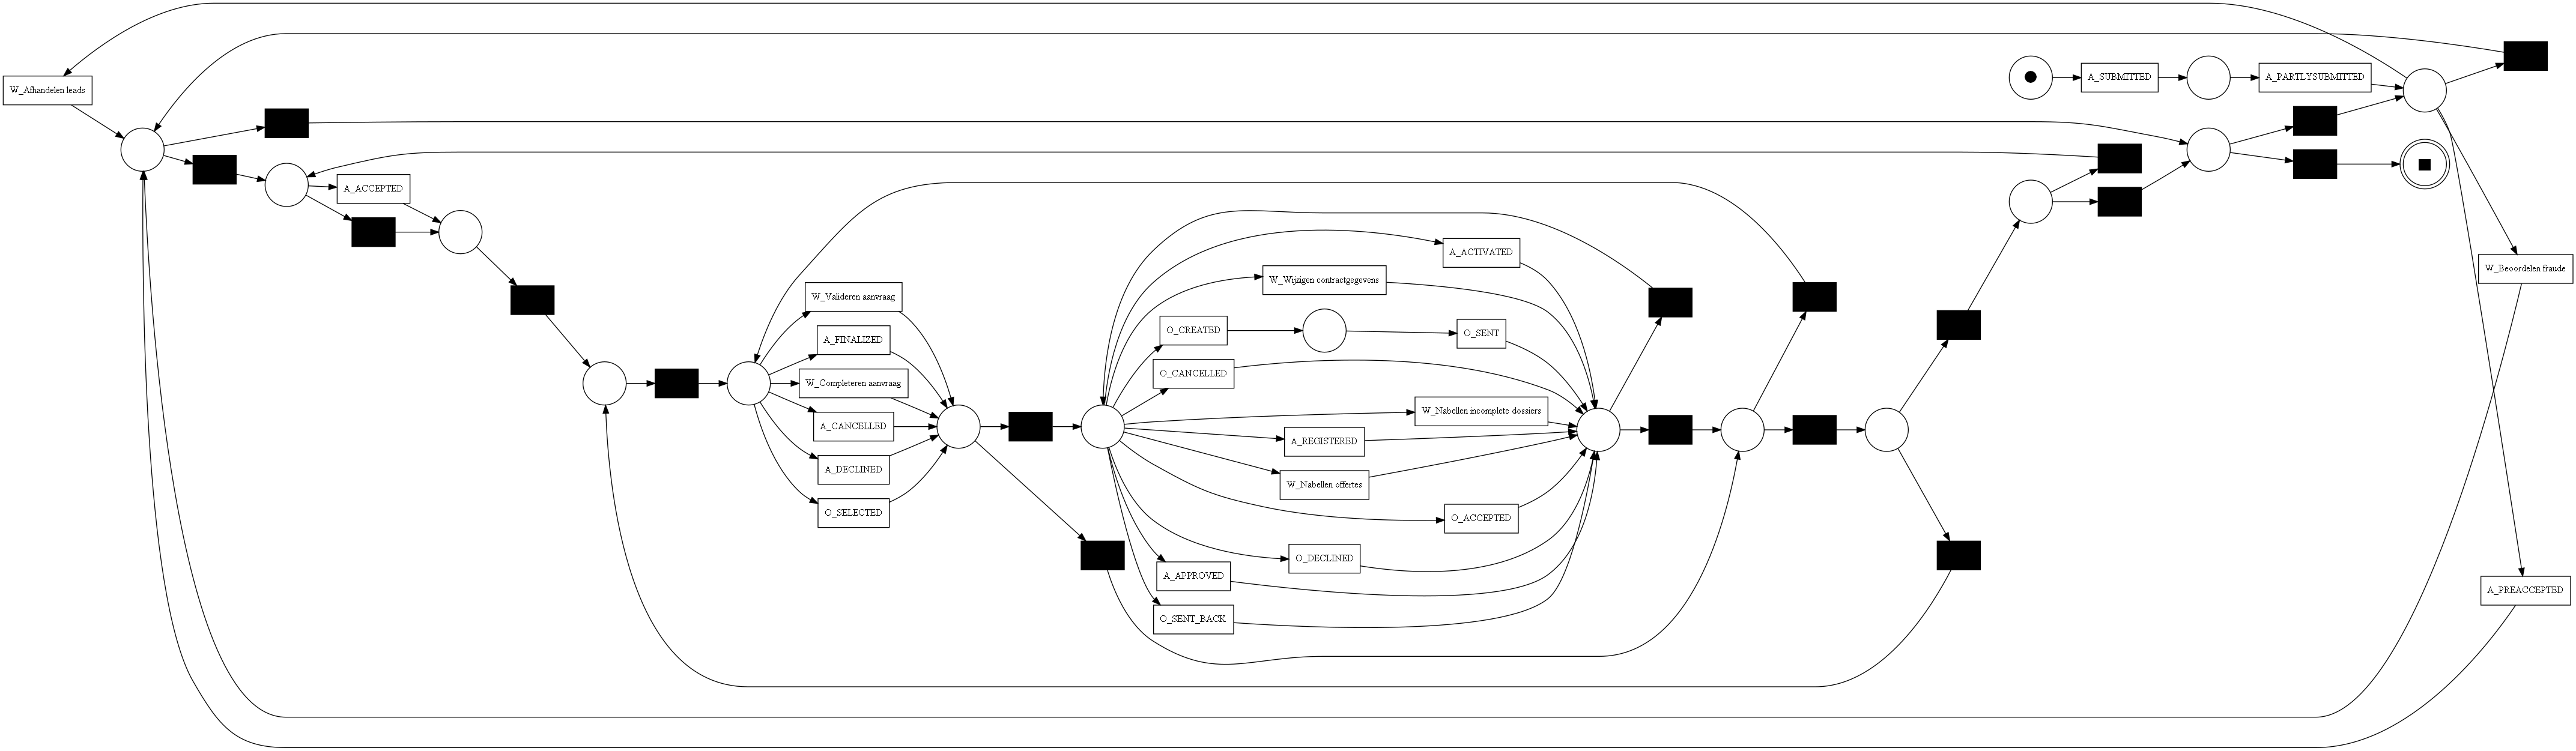

In [7]:
#Petri Net Miner From Inductive Miner

from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(tree, variant=pt_converter.Variants.TO_PETRI_NET)
pm4py.view_petri_net(net, initial_marking, final_marking)
